<a href="https://colab.research.google.com/github/AdrianAlbrecht/Collab/blob/main/SSI_Grupowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math

In [2]:
def euklides(lista_1, lista_2):
  wynik = 0
  if len(lista_1) == len(lista_2):
    for i in range(len(lista_1)):
      wynik+= (lista_1[i] - lista_2[i])**2
    return math.sqrt(wynik)
  return -1

In [3]:
print(euklides([1,2],[5,14]))

12.649110640673518


In [4]:
values = np.loadtxt("spirala.txt", skiprows=0, dtype='double')
headers = pd.read_table("spirala-type.txt", header = None)
df = pd.DataFrame(values)
df.columns = list(headers[0])
df

,x,y
0,-0.0824,0.9435
1,0.0913,0.9575
2,0.0476,1.0683
3,0.2311,1.0452
4,0.2269,0.9615
...,...,...
96,-0.5031,1.8191
97,-0.3340,1.8515
98,-0.3200,1.9158
99,-0.2074,1.9929


In [5]:
df['class'] = -1
df = df.values.tolist()

Algorytm tworzy k grup, każda z tych grup posiada środek (średnią z grupy). Algorytm działa w ten sposób, iż przez zadaną liczbę iteracji na przemian określa dla każdej próbki do której z grup należy (czyli do którego z k środków ma najbliżej) a następnie dla każdej z poprzednio ustalonej grupy wyznacza osobno środek. Algorytm do poprawnego zadania musi zawierać informację n/t środków k grup oraz musi posiadać informację n/t tego, które próbki mają najbliżej do danej grupy. Start algorytmu, liczba grup, iteracji i miara odległości nie jest z góry ustalona. W tym przykładzie polecam użyć 4 grup (m=4), 100 iteracji miary odległości euklidesowej, a na początku ustalenie środka grup równe losowo wybranej grupie różnych próbek.

Algorytm zapisany w postaci pseudokodu:

1. Wybierz losowo m różnych próbek i uznaj je jako środki grup (V)

2. Pętla wykonywana zadaną liczbę iteracji (iters)

2.1. Pętla po wszystkich M próbkach, s to indeks aktualnej próbki

2.1.1. Wylicz odległości między próbką s a każdym środkiem grupy (V)

2.1.2. Wyznacz us równy indeksowi najbliższego środka grupy dla s-tej próbki

2.2. Pętla po wszystkich m grupach, j to indeks aktualnej grupy

2.2.1. Wybierz próbki, należące do tej grupy (zbiór próbek o indeksach s, takich, że us == j), niech zbiór ten nazywa się Xgr

2.2.2. Jeśli zbiór Xgr jest pusty, wtedy pomiń wykonanie dalszej części tej pętli.

2.2.3. Pętla po wszystkich atrybutach, i to index poszczególnego atrybutu

2.2.3.1 Wartość i-tego atrybutu grupy j-tej to średnia wartość atrybutu i-tego wszystkich próbek Xgr

[[-0.0824, 0.9435, 1], [0.0913, 0.9575, 1], [0.0476, 1.0683, 1], [0.2311, 1.0452, 1], [0.2269, 0.9615, 1], [0.2717, 1.057, 1], [0.343, 1.0724, 1], [0.4765, 1.006, 1], [0.5039, 0.9162, 1], [0.5113, 0.8803, 1], [0.6735, 0.8263, 1], [0.803, 0.8494, 1], [0.8318, 0.8573, 1], [0.7825, 0.7032, 1], [0.8566, 0.7646, 1], [0.8544, 0.6752, 1], [1.0519, 0.6502, 1], [1.0302, 0.5818, 1], [1.1587, 0.5559, 1], [1.0992, 0.4486, 1], [1.1175, 0.3286, 1], [1.1493, 0.3144, 1], [1.1607, 0.1619, 1], [1.2388, 0.2232, 1], [1.2136, 0.1041, 1], [1.3375, 0.0204, 1], [1.2301, -0.0344, 1], [1.2946, -0.0799, 1], [1.3301, -0.2716, 3], [1.3287, -0.248, 3], [1.2707, -0.4779, 3], [1.2219, -0.564, 3], [1.2314, -0.5076, 3], [1.071, -0.6311, 3], [1.0461, -0.8127, 3], [1.085, -0.7972, 3], [1.1371, -0.7834, 3], [0.9918, -1.0194, 3], [0.8467, -1.0041, 3], [0.9301, -1.1675, 3], [0.8569, -1.0805, 3], [0.6782, -1.0943, 3], [0.6759, -1.3292, 3], [0.5377, -1.276, 3], [0.4944, -1.2617, 3], [0.4819, -1.2857, 3], [0.4601, -1.3957, 3],

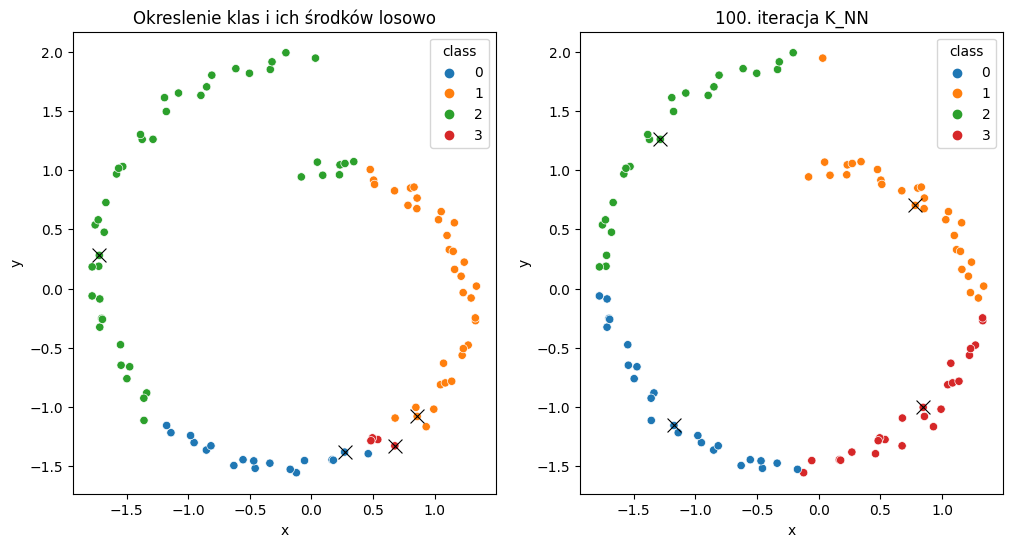

In [6]:
import random
import seaborn as sns
import matplotlib.pyplot as plt

def grupuj(lista):
  slownik = dict()
  for x in lista:
    if x[-1] in slownik.keys():
      slownik[x[-1]].append(x)
    else:
      slownik[x[-1]] = [x]
  return slownik

def k_nn(liczba_grup, iteracje, miara, lista_probek):
  fig, ax = plt.subplots(1, 2)
  fig.set_size_inches(12,6)
  indexy_srodkow = random.sample(range(0, len(lista_probek)), liczba_grup)
  srodki = [lista_probek[x] for x in indexy_srodkow]
  for i in range(iteracje):
    df_srodki = pd.DataFrame(srodki)
    df_srodki.columns = ['x','y','class']
    for sample in lista_probek:
      lista_odleglosci = [miara(sample[:-1],srodek[:-1]) for srodek in srodki]
      sample[-1] = lista_odleglosci.index(min(lista_odleglosci))
    grupy = grupuj(lista_probek)
    for key in grupy.keys():
      odleglosci = [sum([miara(point,x) for x in grupy[key]]) for point in grupy[key]]
      ind_nowego_srodka = odleglosci.index(min(odleglosci))
      srodki[key] = grupy[key][ind_nowego_srodka]
    if(i==0):
      df = pd.DataFrame(lista_probek)
      df.columns = ['x','y','class']
      sns.scatterplot(ax=ax[0],x='x', y='y', data=df, hue='class', palette="tab10")
      sns.scatterplot(ax=ax[0],x='x',y='y',data=df_srodki, s =100, marker="x", legend=False, c = "black")
      ax[0].set_title('Okreslenie klas i ich środków losowo')
  df = pd.DataFrame(lista_probek)
  df.columns = ['x','y','class']
  sns.scatterplot(ax=ax[1],x='x', y='y', data=df, hue='class', palette="tab10")
  sns.scatterplot(ax=ax[1],x='x',y='y',data=df_srodki, s =100, marker="x", legend=False, c = "black")
  ax[1].set_title(f'{i+1}. iteracja K_NN')
  return lista_probek


print(k_nn(4,100,euklides,df))

In [7]:
values = np.loadtxt("spirala.txt", skiprows=0, dtype='double')
headers = pd.read_table("spirala-type.txt", header = None)
df = pd.DataFrame(values)
df.columns = list(headers[0])
df['class'] = 0
df = df.values.tolist()
df

[[-0.0824, 0.9435, 0.0],
 [0.0913, 0.9575, 0.0],
 [0.0476, 1.0683, 0.0],
 [0.2311, 1.0452, 0.0],
 [0.2269, 0.9615, 0.0],
 [0.2717, 1.057, 0.0],
 [0.343, 1.0724, 0.0],
 [0.4765, 1.006, 0.0],
 [0.5039, 0.9162, 0.0],
 [0.5113, 0.8803, 0.0],
 [0.6735, 0.8263, 0.0],
 [0.803, 0.8494, 0.0],
 [0.8318, 0.8573, 0.0],
 [0.7825, 0.7032, 0.0],
 [0.8566, 0.7646, 0.0],
 [0.8544, 0.6752, 0.0],
 [1.0519, 0.6502, 0.0],
 [1.0302, 0.5818, 0.0],
 [1.1587, 0.5559, 0.0],
 [1.0992, 0.4486, 0.0],
 [1.1175, 0.3286, 0.0],
 [1.1493, 0.3144, 0.0],
 [1.1607, 0.1619, 0.0],
 [1.2388, 0.2232, 0.0],
 [1.2136, 0.1041, 0.0],
 [1.3375, 0.0204, 0.0],
 [1.2301, -0.0344, 0.0],
 [1.2946, -0.0799, 0.0],
 [1.3301, -0.2716, 0.0],
 [1.3287, -0.248, 0.0],
 [1.2707, -0.4779, 0.0],
 [1.2219, -0.564, 0.0],
 [1.2314, -0.5076, 0.0],
 [1.071, -0.6311, 0.0],
 [1.0461, -0.8127, 0.0],
 [1.085, -0.7972, 0.0],
 [1.1371, -0.7834, 0.0],
 [0.9918, -1.0194, 0.0],
 [0.8467, -1.0041, 0.0],
 [0.9301, -1.1675, 0.0],
 [0.8569, -1.0805, 0.0],
 [0.6782

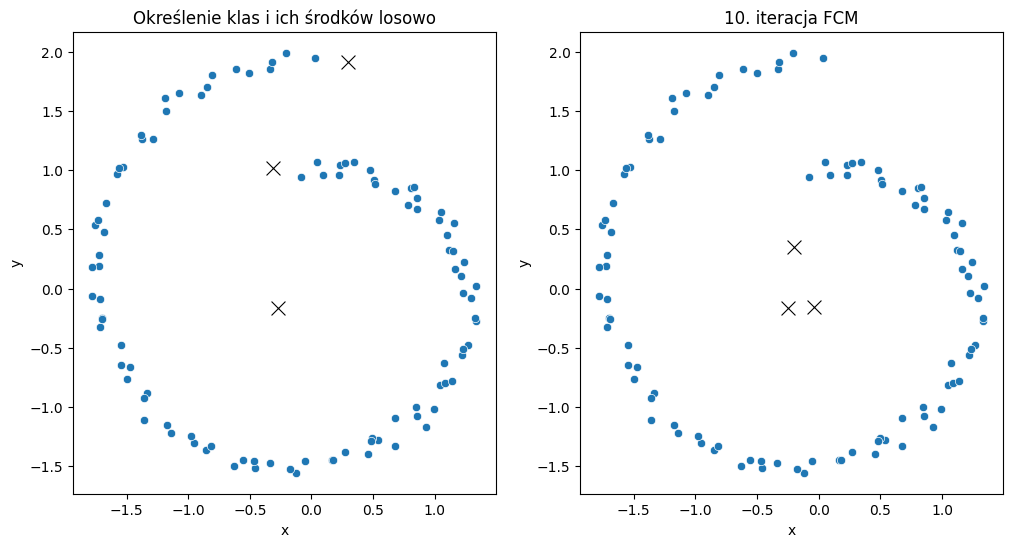

[[-0.0824, 0.9435, [0.13037663521824655, 0.4429688569083954, 0.42665450787335807]], [0.0913, 0.9575, [0.14789602258059403, 0.4454592640979482, 0.40664471332145785]], [0.0476, 1.0683, [0.15729787072185492, 0.43533432348363055, 0.4073678057945145]], [0.2311, 1.0452, [0.17311997221367365, 0.4366694596804795, 0.3902105681058469]], [0.2269, 0.9615, [0.16557817496288754, 0.4434726630381367, 0.3909491619989757]], [0.2717, 1.057, [0.1787613318919296, 0.43498343409106577, 0.3862552340170046]], [0.343, 1.0724, [0.18812920630071092, 0.4321090383920107, 0.3797617553072784]], [0.4765, 1.006, [0.2020283012235418, 0.4311282875506189, 0.3668434112258394]], [0.5039, 0.9162, [0.20435122346558804, 0.43447685347417975, 0.3611719230602322]], [0.5113, 0.8803, [0.20536680389910106, 0.4358397476667942, 0.35879344843410477]], [0.6735, 0.8263, [0.23025248963842082, 0.4270871337207358, 0.3426603766408433]], [0.803, 0.8494, [0.24541038003224408, 0.4181412838523612, 0.33644833611539465]], [0.8318, 0.8573, [0.24824

In [8]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

def calculate_distance(point, centroid):
    return math.sqrt((point[0] - centroid[0])**2 + (point[1] - centroid[1])**2)

def fcm(num_clusters, max_iterations, data):
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)

    centroids = [(random.uniform(-2, 1.5), random.uniform(-1.5, 2)) for _ in range(num_clusters)]

    for iteration in range(max_iterations):
        df_centroids = pd.DataFrame(centroids, columns=['x', 'y'])
        for sample in data:
            distances = [calculate_distance(sample, centroid) for centroid in centroids]
            membership_values = [1 / sum((d / distances[j]) ** 2 for d in distances) for j in range(num_clusters)]
            sample[-1] = membership_values
        for i in range(num_clusters):
            weights = [sample[-1][i] for sample in data]
            sum_weights = sum(weights)
            centroids[i] = (
                sum(sample[0] * w for sample, w in zip(data, weights)) / sum_weights,
                sum(sample[1] * w for sample, w in zip(data, weights)) / sum_weights
            )

        if iteration == 0:
            df = pd.DataFrame(data, columns=['x', 'y', 'membership'])
            sns.scatterplot(ax=ax[0], x='x', y='y', data=df, palette='tab10')
            sns.scatterplot(ax=ax[0], x='x', y='y', data=df_centroids, s=100, marker='x', legend=False, c='black')
            ax[0].set_title('Określenie klas i ich środków losowo')

    df = pd.DataFrame(data, columns=['x', 'y', 'membership'])
    sns.scatterplot(ax=ax[1], x='x', y='y', data=df, palette='tab10')
    sns.scatterplot(ax=ax[1], x='x', y='y', data=df_centroids, s=100, marker='x', legend=False, c='black')
    ax[1].set_title(f'{iteration + 1}. iteracja FCM')

    return data

# Przykład użycia
data = [
    [-1.0, -1.0, []],
    [0.5, 0.5, []],
    [-1.5, -1.0, []],
    [1.0, 1.0, []],
    [1.5, 1.5, []],
    [0.0, 0.0, []]
]

num_clusters = 3
max_iterations = 10

result = fcm(num_clusters, max_iterations, df)
plt.show()
print(result)

In [9]:
values = np.loadtxt("spirala.txt", skiprows=0, dtype='double')
headers = pd.read_table("spirala-type.txt", header = None)
df = pd.DataFrame(values)
df.columns = list(headers[0])
df = df.values.tolist()
df

[[-0.0824, 0.9435],
 [0.0913, 0.9575],
 [0.0476, 1.0683],
 [0.2311, 1.0452],
 [0.2269, 0.9615],
 [0.2717, 1.057],
 [0.343, 1.0724],
 [0.4765, 1.006],
 [0.5039, 0.9162],
 [0.5113, 0.8803],
 [0.6735, 0.8263],
 [0.803, 0.8494],
 [0.8318, 0.8573],
 [0.7825, 0.7032],
 [0.8566, 0.7646],
 [0.8544, 0.6752],
 [1.0519, 0.6502],
 [1.0302, 0.5818],
 [1.1587, 0.5559],
 [1.0992, 0.4486],
 [1.1175, 0.3286],
 [1.1493, 0.3144],
 [1.1607, 0.1619],
 [1.2388, 0.2232],
 [1.2136, 0.1041],
 [1.3375, 0.0204],
 [1.2301, -0.0344],
 [1.2946, -0.0799],
 [1.3301, -0.2716],
 [1.3287, -0.248],
 [1.2707, -0.4779],
 [1.2219, -0.564],
 [1.2314, -0.5076],
 [1.071, -0.6311],
 [1.0461, -0.8127],
 [1.085, -0.7972],
 [1.1371, -0.7834],
 [0.9918, -1.0194],
 [0.8467, -1.0041],
 [0.9301, -1.1675],
 [0.8569, -1.0805],
 [0.6782, -1.0943],
 [0.6759, -1.3292],
 [0.5377, -1.276],
 [0.4944, -1.2617],
 [0.4819, -1.2857],
 [0.4601, -1.3957],
 [0.2684, -1.382],
 [0.1669, -1.4465],
 [0.1774, -1.4508],
 [-0.0566, -1.4538],
 [-0.1226, -1.

In [10]:
def blend_colors(color_names, percentages):
    if len(color_names) != len(percentages):
        raise ValueError("Listy kolorów i procentów muszą mieć tę samą długość.")

    if sum(percentages) != 100.0:
        raise ValueError("Suma procentów musi wynosić 100.")

    rgb_colors = []

    for color_name in color_names:
        color_name = color_name.lower()
        if color_name == "red":
            rgb_colors.append((255, 0, 0))
        elif color_name == "green":
            rgb_colors.append((0, 255, 0))
        elif color_name == "blue":
            rgb_colors.append((0, 0, 255))
        else:
            raise ValueError(f"Niewspierany kolor: {color_name}")

    final_color = [0, 0, 0]

    for i in range(len(rgb_colors)):
        r, g, b = rgb_colors[i]
        percentage = percentages[i] / 100.0
        final_color[0] += int(r * percentage)
        final_color[1] += int(g * percentage)
        final_color[2] += int(b * percentage)

    hex_color = "#{:02X}{:02X}{:02X}".format(final_color[0], final_color[1], final_color[2])

    return hex_color

# Przykład użycia
color_names = ["red", "green", "blue"]
#percentages = [40.0, 30.0, 30.0]

#resulting_color = blend_colors(color_names, percentages)
#print("Wynikowy kolor (HEX):", resulting_color)

(101, 2)


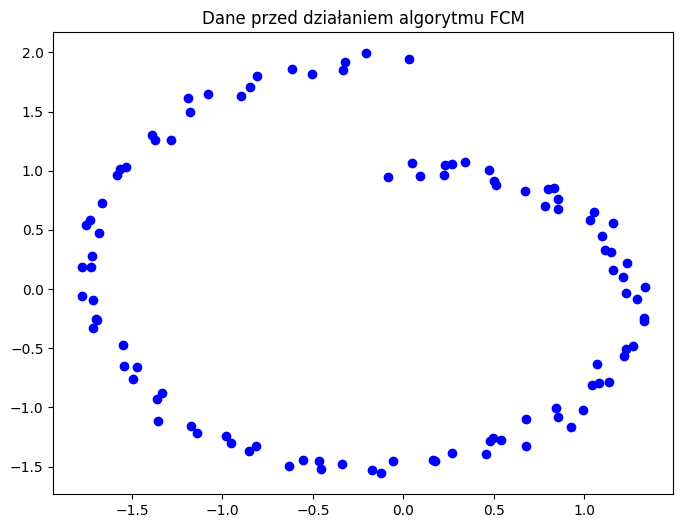

[[78.06510475596168, 9.74238255879593, 12.192512685242393], [9.505319991127775, 81.9562355230714, 8.538444485800841], [5.040627622524829, 90.66394742944804, 4.29542494802713], [7.05717672194702, 87.3853124888292, 5.557510789223784], [5.183153055414555, 90.10818482218393, 4.708662122401522], [38.10940172295815, 47.099061748550525, 14.791536528491337], [3.0775150519612575, 94.30709929857774, 2.6153856494610133], [6.838739589809801, 87.76492589463759, 5.396334515552603], [16.919889443094995, 74.56688764258172, 8.51322291432328], [15.716845028688864, 68.38202031957563, 15.901134651735507], [22.05008858786604, 30.175562095686654, 47.77434931644732], [34.4703837605886, 52.77464084484933, 12.754975394562084], [20.49654527924264, 47.055814452720305, 32.44764026803706], [15.262225698985048, 9.96777774216583, 74.76999655884913], [14.001700918156418, 78.90820636620658, 7.090092715636996], [0.4161586253369157, 99.30149736517137, 0.2823440094917239], [73.10625067206018, 15.052557703676642, 11.84119

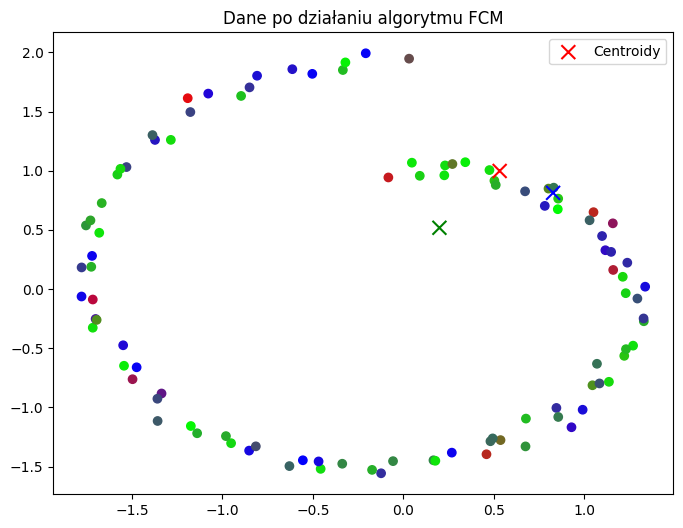

In [18]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Inicjalizacja algorytmu
def initialize_fcm(num_clusters, num_samples, num_features):
    U = np.random.rand(num_clusters, num_samples)
    U = U / U.sum(axis=0)  # Normalizacja do sumy równa 1
    V = np.random.rand(num_clusters, num_features)
    D = np.random.rand(num_samples, num_features)
    return U, V, D

# Obliczanie odległości między próbkami a grupami
def calculate_distances(U, V, D):
    num_clusters, num_samples = U.shape
    num_features = V.shape[1]
    distances = np.zeros((num_clusters, num_samples))

    for j in range(num_clusters):
        for s in range(num_samples):
            diff = D - V[j]
            distances[j, s] = np.linalg.norm(diff[s])

    return distances

# Obliczanie nowych wartości przynależności U
def update_membership(U, distances, fuzziness):
    num_clusters, num_samples = U.shape
    new_U = np.zeros((num_clusters, num_samples))

    for j in range(num_clusters):
        for s in range(num_samples):
            dist = distances[j, s]
            for k in range(num_clusters):
                if dist == 0:
                    new_U[j, s] = 1.0
                else:
                    new_U[j, s] += (dist / distances[k, s]) ** (2 / (fuzziness - 1))

    new_U = 1 / new_U
    return new_U / new_U.sum(axis=0)

# Główna pętla programu
def fuzzy_c_means(num_clusters, num_samples, num_features, max_iterations, fuzziness):
    U, V, D = initialize_fcm(num_clusters, num_samples, num_features)

    for iteration in range(max_iterations):
        distances = calculate_distances(U, V, D)
        U = update_membership(U, distances, fuzziness)

    return U, V

# Generowanie danych przykładowych
num_clusters = 3
num_samples = len(df)
num_features = 2
max_iterations = 10
fuzziness = 2

data = np.array(df)
print(data.shape)

# Uruchomienie algorytmu FCM
U, V = fuzzy_c_means(num_clusters, num_samples, num_features, max_iterations, fuzziness)

# Wykres danych przed działaniem algorytmu
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='b', marker='o')
plt.title('Dane przed działaniem algorytmu FCM')
plt.show()

# Wykres danych po działaniu algorytmu FCM
cluster_centers = V
cluster_indices = list([list(x) for x in U.T*100])
print(cluster_indices)
for i in range(len(cluster_indices)):
  for j in range(len(cluster_indices[i])-1):
    cluster_indices[i][j] = round(cluster_indices[i][j])
  cluster_indices[i][-1] = 100 - sum(cluster_indices[i][:-1])
print(cluster_indices)
cluster_indices = [blend_colors(color_names, x) for x in cluster_indices]
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=cluster_indices, cmap='tab10', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c=['r','g','b'], marker='x', s=100, label='Centroidy')
plt.title('Dane po działaniu algorytmu FCM')
plt.legend()
plt.show()
